# We Rate Dogs Data Analysis 

## Table of Contents

1. [Introduction](#introduction)
2. [Data Wrangling](#data-wrangling)
    1. [Gathering data](#gathering-data)
    2. [Assessing data](#assessing-data)
    3. [Cleaning data](#cleaning-data) 
3. [Analysis and Visualization](#analysis-and-visualization)
4. [Reporting](#reporting)

## Introduction <a name="introduction"></a>
We are going to analyze data coming from the WeRateDogs Twitter account. This project aims to practice thorough data wrangling techniques. Thereafter, we will analyze our clean data to find interesting facts, visualize our findings and write a report.

https://twitter.com/dog_rates/

**About WeRateDogs:**  
WeRateDogs is a Twitter account that is humorously introduces dogs. Usually, dogs are being introduced by their name, a photo and a funny comment using doggo lingo, an internet language around the love of dogs. Dogs are mostly being classified according to their dog stage: 'doggo', 'puppo', 'pupper' or 'floofer'. Additionally, dogs are being rated by a not-so-serious number out of 10 points. Usually the number is higher than it's denominator.

**Our data**  
We are going to work on 3 different data sets. Udacity provided a WeRateDogs archive containing tweet data from 11/2015 to 07/2017. As this data sets is not sufficient, we are going to use Twitter's API to find more information. The 3rd data set contains predictions of dog breeds of the tweet images, that was generated using a neural network.


To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import json
import time
import json
import requests
import os
from os import path
import re
from IPython.display import Image
from PIL import Image

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# style settings
plt.xkcd() # comic style
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)

## Data Wrangling <a name="data-wrangling"></a>
In this section of the project, we first gather our data. Then we make ourselves familiar with the data and asses for quality and tidiness issues. The 3rd step is to to clean our data. In order to prepare our records for analysis, we are going to correct or remove any corrupt, inaccurate and unnecessary observations.   

### Gathering Data <a name="gathering-data"></a>

**WeRateDogs Twitter Archive**  
Read in the first data set: WeRateDogs Twitter archive provided by Udacity.

In [2]:
# read in Twitter archive 
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193 NaN                    NaN                    
1  892177421306343426 NaN                    NaN                    
2  891815181378084864 NaN                    NaN                    
3  891689557279858688 NaN                    NaN                    
4  891327558926688256 NaN                    NaN                    

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0 NaN                  NaN                        NaN                         
1 NaN                  NaN                        NaN                         
2 NaN                  NaN                        NaN                         
3 NaN                  NaN                        NaN                         
4 NaN                  NaN                        NaN                         

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0  13                10                  Phineas   None  None    None   None  
1  13                10                  Tilly     None  None    None   None  
2  12                10                  Archie    None  None    None   None  
3  13                10                  Darla     None  None    None   None  
4  12                10                  Franklin  None  None    None   None

**Image Predictions**  
Download and read in image predictions file provided by Udacity.

In [3]:
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# # download file programmatically
# response = requests.get(url)
    
# # create new file if not existent
# if not os.path.exists('image-predictions.tsv'):
#     file = open('image-predictions.tsv', 'w')
#     file.close()

# # open file and write file content
# with open('image-predictions.tsv', 'wb') as file_image_predictions:
#         file_image_predictions.write(response.content)
        

In [4]:
# load image predictions into data frame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0  1        Welsh_springer_spaniel  0.465074  True    collie               
1  1        redbone                 0.506826  True    miniature_pinscher   
2  1        German_shepherd         0.596461  True    malinois             
3  1        Rhodesian_ridgeback     0.408143  True    redbone              
4  1        miniature_pinscher      0.560311  True    Rottweiler           

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665  True    Shetland_sheepdog    0.061428  True    
1  0.074192  True    Rhodesian_ridgeback  0.072010  True    
2  0.138584  True    bloodhound           0.116197  True    
3  0.360687  True    miniature_pinscher   0.222752  True    
4  0.243682  True    Doberman             0.154629  True

**Twitter API data**    
We are going to query Twitter's API for additional tweet information using Tweepy and saving it as JSON. 

In [5]:
# Login

# hide login details
# with open('logins.json') as login_file:
#     logins = json.load(login_file)

# def get_secret(setting, logins=logins):
#     """Get login setting or fail with ImproperlyConfigured"""
#     try:
#         return logins[setting]
#     except KeyError:
#         raise ImproperlyConfigured("Set the {} setting.".format(setting))

In [6]:
# retrieve Twitter login details 
# consumer_key = get_secret('consumer_key')
# consumer_secret = get_secret('consumer_secret')
# access_token = get_secret('access_token')
# access_secret = get_secret('access_secret')

In [7]:
# # access Twitter API
# import tweepy

# # Redirect to Twitter to authorize
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# # Get access token
# auth.set_access_token(access_token, access_secret)

# # API instance
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [8]:
# Request tweets from WeRateDogs Twitter timeline 
# start = time.time()
# print("Start requesting WeRateDogs tweets.")
# with open('tweet_json.txt', 'w', encoding='utf-8') as file:
#     file.write("[\n")
#     for index, tweet_id in enumerate(twitter_dogs_archive.tweet_id.values):
#         ranking = index + 1 
#         try:
#             # Twitter API request using specific tweet_id
#             status = api.get_status(tweet_id, tweet_mode='extended')
#             status_json = json.dumps(status._json)

#             # write json object
#             file.write(status_json)
#             if ranking < len(twitter_dogs_archive.tweet_id.values):
#                 file.write(",")
#             file.write("\n")
            
#             # This cell is slow so print ranking to gauge time remaining
#             print(ranking, '-', tweet_id)

#         except tweepy.TweepError as e:
#             # catch erroneos
#             e = e.response.text
#             print(e)
#     file.write("]")
# end = time.time()
# print("Process finisheed. Time elapsed: ", round((end-start) / 60, 2), "min." )

In [9]:
# Read tweet_json.txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.
tweets = []
with open('tweet_json.txt', 'r') as file:
    data = json.loads(file.read())
    for i in range(0, len(data)):
        record = {"tweet_id": data[i]["id"], "retweet_count": data[i]['retweet_count'], "favorite_count": data[i]["favorite_count"]}
        tweets.append(record)

tweets_df = pd.DataFrame(tweets)
tweets_df.head()

favorite_count  retweet_count            tweet_id
0  37683           8215           892420643555336193
1  32373           6076           892177421306343426
2  24378           4017           891815181378084864
3  41004           8370           891689557279858688
4  39208           9075           891327558926688256

### Assassing Data <a name="assessing-data"></a>
In this section, we are getting acquainted with our data, using visual and programmatic tools. We are going to watch out for low quality content issues and structural issues. Unclean data is being documented at the end of the assessment section. 

#### Visual assessment  
Here, we are scanning visually through our data sets. Please be aware that most of the visual assessment was being done using Excel for convenience reasons.

In [10]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193 NaN                    NaN                    
1     892177421306343426 NaN                    NaN                    
2     891815181378084864 NaN                    NaN                    
3     891689557279858688 NaN                    NaN                    
4     891327558926688256 NaN                    NaN                    
5     891087950875897856 NaN                    NaN                    
6     890971913173991426 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
8     890609185150312448 NaN                    NaN                    
9     890240255349198849 NaN                    NaN                    
10    890006608113172480 NaN                    NaN                    
11    889880896479866881 NaN                    NaN                    
12    889665388333682689 NaN                    NaN                    
13    889638837579907072 NaN                    NaN                    
14    889531135344209921 NaN                    NaN                    
15    889278841981685760 NaN                    NaN                    
16    888917238123831296 NaN                    NaN                    
17    888804989199671297 NaN                    NaN                    
18    888554962724278272 NaN                    NaN                    
19    888202515573088257 NaN                    NaN                    
20    888078434458587136 NaN                    NaN                    
21    887705289381826560 NaN                    NaN                    
22    887517139158093824 NaN                    NaN                    
23    887473957103951883 NaN                    NaN                    
24    887343217045368832 NaN                    NaN                    
25    887101392804085760 NaN                    NaN                    
26    886983233522544640 NaN                    NaN                    
27    886736880519319552 NaN                    NaN                    
28    886680336477933568 NaN                    NaN                    
29    886366144734445568 NaN                    NaN                    
30    886267009285017600  8.862664e+17           2.281182e+09          
31    886258384151887873 NaN                    NaN                    
32    886054160059072513 NaN                    NaN                    
33    885984800019947520 NaN                    NaN                    
34    885528943205470208 NaN                    NaN                    
35    885518971528720385 NaN                    NaN                    
36    885311592912609280 NaN                    NaN                    
37    885167619883638784 NaN                    NaN                    
38    884925521741709313 NaN                    NaN                    
39    884876753390489601 NaN                    NaN                    
40    884562892145688576 NaN                    NaN                    
41    884441805382717440 NaN                    NaN                    
42    884247878851493888 NaN                    NaN                    
43    884162670584377345 NaN                    NaN                    
44    883838122936631299 NaN                    NaN                    
45    883482846933004288 NaN                    NaN                    
46    883360690899218434 NaN                    NaN                    
47    883117836046086144 NaN                    NaN                    
48    882992080364220416 NaN                    NaN                    
49    882762694511734784 NaN                    NaN                    
50    882627270321602560 NaN                    NaN                    
51    882268110199369728 NaN                    NaN                    
52    882045870035918850 NaN                    NaN                    
53    881906580714921986 NaN                    NaN                    
54    881666595344535552 NaN                    NaN     

In [11]:
tweets_df

favorite_count  retweet_count            tweet_id
0     37683           8215           892420643555336193
1     32373           6076           892177421306343426
2     24378           4017           891815181378084864
3     41004           8370           891689557279858688
4     39208           9075           891327558926688256
5     19710           3010           891087950875897856
6     11525           1989           890971913173991426
7     63568           18247          890729181411237888
8     27094           4132           890609185150312448
9     31067           7134           890240255349198849
10    29882           7093           890006608113172480
11    27082           4817           889880896479866881
12    46824           9714           889665388333682689
13    26399           4384           889638837579907072
14    14722           2179           889531135344209921
15    24577           5201           889278841981685760
16    28359           4359           888917238123831296
17    24878           4140           888804989199671297
18    19310           3423           888554962724278272
19    21183           3374           888078434458587136
20    29405           5210           887705289381826560
21    45061           11328          887517139158093824
22    67134           17577          887473957103951883
23    32790           10096          887343217045368832
24    29778           5769           887101392804085760
25    34191           7520           886983233522544640
26    11726           3165           886736880519319552
27    21852           4321           886680336477933568
28    20632           3098           886366144734445568
29    116             4              886267009285017600
30    27263           6099           886258384151887873
31    0               105            886054160059072513
32    31761           6559           885984800019947520
33    35034           6220           885528943205470208
34    19909           3631           885518971528720385
35    0               17960          885311592912609280
36    21341           4247           885167619883638784
37    75307           17675          884925521741709313
38    27165           5442           884876753390489601
39    23640           4542           884562892145688576
40    26301           5487           884441805382717440
41    71014           19873          884247878851493888
42    19828           2887           884162670584377345
43    21321           3338           883838122936631299
44    44713           9621           883482846933004288
45    22091           3594           883360690899218434
46    36177           6456           883117836046086144
47    23312           3804           882992080364220416
48    27563           4748           882762694511734784
49    27202           5908           882627270321602560
50    43753           11237          882268110199369728
51    28571           4801           882045870035918850
52    23676           3294           881906580714921986
53    49288           10357          881666595344535552
54    124             7              881633300179243008
55    48147           15479          881536004380872706
56    22517           5030           881268444196462592
57    16612           2702           880935762899988482
58    20713           3713           880872448815771648
59    27791           6091           880465832366813184
60    26324           4092           880221127280381952
61    26920           4210           880095782870896641
62    21773           3393           879862464715927552
63    302             10             879674319642796034
64    22837           3086           879492040517615616
65    103110          42970          879415818425184262
66    16376           3021           879376492567855104
67    0               6612           879130579576475649
68    21964           4567           879050749262655488
69    18513           2615           879008229531029506
70    18929           4007    

In [12]:
image_predictions

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
30    666418789513326592   
31    666421158376562688   
32    666428276349472768   
33    666430724426358785   
34    666435652385423360   
35    666437273139982337   
36    666447344410484738   
37    666454714377183233   
38    666644823164719104   
39    666649482315059201   
40    666691418707132416   
41    666701168228331520   
42    666739327293083650   
43    666776908487630848   
44    666781792255496192   
45    666786068205871104   
46    666804364988780544   
47    666817836334096384   
48    666826780179869698   
49    666835007768551424   
50    666837028449972224   
51    666983947667116034   
52    666996132027977728   
53    667012601033924608   
54    667044094246576128   
55    667062181243039745   
56    667065535570550784   
57    667073648344346624   
58    667090893657276420   
59    667119796878725120   
60    667138269671505920   
61    667152164079423490   
62    667160273090932737   
63    667165590075940865   
64    667171260800061440   
65    667174963120574464   
66    667176164155375616   
67    667177989038297088   
68    667182792070062081   
69    667188689915760640   
70    667192066997374976   
71    667200525029539841   
72    667211855547486208   
73    667369227918143488   
74    667393430834667520   
75    667405339315146752   
76    667435689202614272   
77    667437278097252352   
78    667443425659232256   
79    667453023279554560   
80    667455448082227200   
81    667470559035432960   
82    667491009379606528   
83    667495797102141441   
84    667502640335572993   
85    667509364010450944   
86    667517642048163840   
87    667524857454854144   
88    667530908589760512   
89    667534815156183040   
90    667538891197542400   
91    667544320556335104   
92    667546741521195010   
93    667549055577362432   
94    667550882905632768   
95    667550904950915073   
96    667724302356258817   
97    667728196545200128   
98    667766675769573376   
99    667773195014021121   
100   667782464991965184   
101   667793409583771648   
102   667801013445750784   
103   667806454573760512   
104   667832474953625600   
105   667861340749471744   
106   667866724293877760   
107   667873844930215936   
108   667878741721415682   
109   667885044254572545   
110   667886921285246976   
111   667902449697558528   
112   667911425562669056   
113   667915453470232577   
114   667924896115245057   
115   667937095915278337   
116   668113020489474048   
117   668142349051129856   
118   668154635664932864   
119   668171859951755264   
120   668190681446379520   
121   668204964695683073   
122   668221241640230912   
123   668226093875376128   
124   668237644992782336   
125   668248472370458624   
126   668256321989451776   
127   668268907921326080   
128   668274247790391296   
129   668286279830867968   
130   668291999406125056   
131   668297328638447616   
132   668466899341221888   
133   668480044826800133   
134   668484198282485761   
135   668496999348633600   
136   668507509523615744   
137   668528771708952576   
138   668537837512433665   
139   668542336805281792   
140   668544745690562560   
141   668567822092664832   
142   668614

#### Programmatic assessment

**Assess Twitter archive**

In [13]:
# Assess Twitter achive.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Assessing retweets in Twitter archive. We identify retweets by a non-null value in "in_reply_to_status". 
retweets = twitter_archive[twitter_archive.retweeted_status_id.notna()]['retweeted_status_id'].values.astype(np.int64)
twitter_archive[twitter_archive.retweeted_status_id.notna()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257 NaN                    NaN                    
32    886054160059072513 NaN                    NaN                    
36    885311592912609280 NaN                    NaN                    
68    879130579576475649 NaN                    NaN                    
73    878404777348136964 NaN                    NaN                    
74    878316110768087041 NaN                    NaN                    
78    877611172832227328 NaN                    NaN                    
91    874434818259525634 NaN                    NaN                    
95    873697596434513921 NaN                    NaN                    
97    873337748698140672 NaN                    NaN                    
101   872668790621863937 NaN                    NaN                    
109   871166179821445120 NaN                    NaN                    
118   869988702071779329 NaN                    NaN                    
124   868639477480148993 NaN                    NaN                    
130   867072653475098625 NaN                    NaN                    
132   866816280283807744 NaN                    NaN                    
137   866094527597207552 NaN                    NaN                    
146   863471782782697472 NaN                    NaN                    
155   861769973181624320 NaN                    NaN                    
159   860981674716409858 NaN                    NaN                    
160   860924035999428608 NaN                    NaN                    
165   860177593139703809 NaN                    NaN                    
171   858860390427611136 NaN                    NaN                    
180   857062103051644929 NaN                    NaN                    
182   856602993587888130 NaN                    NaN                    
185   856330835276025856 NaN                    NaN                    
194   855245323840757760 NaN                    NaN                    
195   855138241867124737 NaN                    NaN                    
204   852936405516943360 NaN                    NaN                    
211   851953902622658560 NaN                    NaN                    
212   851861385021730816 NaN                    NaN                    
222   849668094696017920 NaN                    NaN                    
230   847978865427394560 NaN                    NaN                    
231   847971574464610304 NaN                    NaN                    
247   845459076796616705 NaN                    NaN                    
250   845098359547420673 NaN                    NaN                    
260   842892208864923648 NaN                    NaN                    
266   841833993020538882 NaN                    NaN                    
272   840761248237133825 NaN                    NaN                    
273   840728873075638272 NaN                    NaN                    
281   839290600511926273 NaN                    NaN                    
285   838916489579200512 NaN                    NaN                    
286   838831947270979586 NaN                    NaN                    
289   838201503651401729 NaN                    NaN                    
298   837012587749474308 NaN                    NaN                    
302   836648853927522308 NaN                    NaN                    
303   836397794269200385 NaN                    NaN                    
307   835685285446955009 NaN                    NaN                    
309   835536468978302976 NaN                    NaN                    
310   835309094223372289 NaN                    NaN                    
319   834477809192075265 NaN                    NaN                    
327   833732339549220864 NaN                    NaN                    
332   832769181346996225 NaN                    NaN                    
340   832215909146226688 NaN                    NaN                    
341   832215726631055365 NaN                    NaN     

In [15]:
# Test if original tweets of retweets are in Twitter archive.
original_tweets = []
[original_tweets.append(retweet) for retweet in retweets if retweet in twitter_archive.tweet_id.values]
print(len(original_tweets), "original entries out of the retweets are contained in Twitter archive.\n")  

112 original entries out of the retweets are contained in Twitter archive.



In [16]:
# Show all replies to assess if they are relevant for our research.
# We identify retweets by a non-null value in "in_reply_to_status". 
twitter_archive[twitter_archive.in_reply_to_status_id.notna()][['tweet_id','text']]

# -> Some replies are actually Dog Rating posts.

tweet_id  \
30    886267009285017600   
55    881633300179243008   
64    879674319642796034   
113   870726314365509632   
148   863427515083354112   
149   863079547188785154   
179   857214891891077121   
184   856526610513747968   
186   856288084350160898   
188   855862651834028034   
189   855860136149123072   
218   850333567704068097   
228   848213670039564288   
234   847617282490613760   
251   844979544864018432   
274   840698636975636481   
290   838150277551247360   
291   838085839343206401   
313   835246439529840640   
342   832088576586297345   
346   831926988323639298   
387   826598799820865537   
409   823333489516937216   
427   821153421864615936   
498   813130366689148928   
513   811647686436880384   
565   802265048156610565   
570   801854953262350336   
576   800859414831898624   
611   797165961484890113   
701   786051337297522688   
843   766714921925144576   
857   763956972077010945   
967   750381685133418496   
1005  747651430853525504   
1016  746906459439529985   
1018  746818907684614144   
1080  738891149612572673   
1127  729838605770891264   
1295  707983188426153984   
1330  705786532653883392   
1339  704871453724954624   
1345  704491224099647488   
1356  703425003149250560   
1446  696490539101908992   
1452  695767669421768709   
1464  694356675654983680   
1474  693644216740769793   
1479  693582294167244802   
1497  692423280028966913   
1501  692142790915014657   
1523  690607260360429569   
1598  686035780142297088   
1605  685681090388975616   
1618  684969860808454144   
1630  684538444857667585   
1634  684225744407494656   
1663  682808988178739200   
1689  681340665377193984   
1774  678023323247357953   
1819  676590572941893632   
1842  675870721063669760   
1844  675849018447167488   
1852  675707330206547968   
1866  675349384339542016   
1882  674999807681908736   
1885  674793399141146624   
1892  674754018082705410   
1895  674742531037511680   
1905  674606911342424069   
1914  674330906434379776   
1940  673716320723169284   
2036  671729906628341761   
2038  671550332464455680   
2149  669684865554620416   
2169  669353438988365824   
2189  668967877119254528   
2298  667070482143944705   

                                                                                                                                                                       text  
30    @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution                                                              
55    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                            
64    @RealKentMurphy 14/10 confirmed                                                                                                                                        
113   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs                                                                                                           
148   @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10                                 
149   Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen    
179   @Marc_IRL pixelated af 12/10                                                                                                                                           
184   THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA                               
186   @xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10  
188   @dhmontgomery We also gave snoop dogg a 420/10 but I thin

In [17]:
# Assess dog names
twitter_archive.name.value_counts()

None              745
a                 55 
Charlie           12 
Cooper            11 
Lucy              11 
Oliver            11 
Penny             10 
Lola              10 
Tucker            10 
Bo                9  
Winston           9  
the               8  
Sadie             8  
an                7  
Daisy             7  
Buddy             7  
Toby              7  
Bailey            7  
Milo              6  
Koda              6  
Dave              6  
Oscar             6  
Jack              6  
Scout             6  
Stanley           6  
Rusty             6  
Jax               6  
Bella             6  
Leo               6  
Larry             5  
Bentley           5  
Louis             5  
Chester           5  
Sunny             5  
Sammy             5  
Finn              5  
Oakley            5  
very              5  
George            5  
Alfie             5  
Phil              5  
Gus               5  
Clarence          4  
Walter            4  
Scooter           4  
Derek     

In [18]:
# After finding typical mistakes, I'm checking if there is a pattern to recover names  
determiners = ["a", "an", "the", "officially", "old", "just", "quite", "getting", "actually", "mad", "not", "my", "by", "very", "one", "this", "life", "all", "such", "None"]

# loop trough names column and print each text of the text column whenever name equals determiner
for i, row in twitter_archive.iterrows():
    if row['name'] in determiners:
        print(i , "-", row['text'])

5 - Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7 - When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12 - Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
22 - I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
24 - You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25 - This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
30 - @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
32 - RT @Athletics: 12/1

798 - You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV
801 - Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
803 - Here's a couple rufferees making sure all the sports are played fairly today. Both 10/10 would bribe with extra pets https://t.co/H9yjI9eo3A
807 - Doggo will persevere. 13/10
https://t.co/yOVzAomJ6k
814 - Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd
815 - RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0
818 - RT @dog_rates: Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t…
819 - We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 

1000 - PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q
1001 - Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R
1002 - This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004 - Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1005 - Other pupper asked not to have his identity shared. Probably just embarrassed about the headbutt. Also 12/10 it'll be ok mystery pup
1008 - Again w the sharks guys. This week is about dogs ACTING or DRESSING like sharks. NOT actual sharks. Thank u ...11/10 https://t.co/Ie2mWXWjpr
1009 - Guys pls stop sending actual sharks. It's too dangerous for me and the people taking the photos. Thank you ...10/10 https://t.co/12lICZN2SP
1010 - Never seen a sh

1560 - This pupper is sprouting a flower out of her head. 12/10 revolutionary af https://t.co/glmvQBRjv4
1564 - Please send dogs. I'm tired of seeing other stuff like this dangerous pirate. We only rate dogs. Thank you... 10/10 https://t.co/YdLytdZOqv
1566 - 13/10 I can't stop watching this (vid by @k8lynwright) https://t.co/nZhhMRr5Hp
1568 - With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP
1574 - Another magnificent photo. 12/10 https://t.co/X5w387K5jr
1579 - "You got any games on your phone" 7/10 for invasive brown Dalmatian pupper https://t.co/yzGR9xjE9Q
1583 - Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN
1584 - This pupper's New Year's resolution was to become a Hershey's kiss. 11/10 she's super pumped about it https://t.co/D7jYj6vdwC
1586 - This pupper forgot how to walk. 12/10 happens to all of us (vid by @bbuckley96) https://t.co/KFTrkSOuu3
1587 - Strange pu

1822 - This pupper is very passionate about Christmas. Wanted to give the tree a hug. So cute. 8/10 https://t.co/NsGyECJuq7
1823 - ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ
1825 - Three generations of pupper. 11/10 for all https://t.co/tAmQYvzrau
1826 - Hope your Monday isn't too awful. Here's two baseball puppers. 11/10 for each https://t.co/dB0H9hdZai
1828 - All this pupper wanted to do was go skiing. No one told him about the El Niño. Poor pupper. 10/10 maybe next year https://t.co/fTgbq1UBR9
1832 - These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC
1834 - Here we are witnessing a very excited dog. Clearly has no control over neck movements. 8/10 would still pet https://t.co/ICNIjSkrXs
1836 - Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 https://t.co/REyE5YKVBb
1837 - "Yes hello I'ma just snag this here toasted bagel real qu

2267 - Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm
2269 - This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
2272 - Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y
2273 - This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk
2276 - Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N
2277 - Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx
2278 - Ermergerd 12/10 https://t.co/PQni2sjPsm
2281 - Here we have a neat pup. Very white. Cool shades. Upcoming cruise? Great dog 10/10 https://t.co/LEaviT37v1
2284 - *ta

In [19]:
# Assess whether dog stages were correctly extracted from text.
stages = ["doggo", "floofer", "pupper", "puppo"]
for i,row in twitter_archive.iterrows():
    for stage in stages:
        if row[stage] == stage: 
            if not row['text'].find(stage):
                print("Incorrectly extracted dog stage: \n", row)

In [20]:
# Assess whether names were extracted correctly.  
for i,row in twitter_archive.iterrows():
    if not row['name'] in row['text'] and (row['name'] != "None"):
        print(row.tweet_id, row.text, row.name, "\n")

In [21]:
# Assess rating_numerator.
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [22]:
# Checking numerators of 0.
twitter_archive.query('rating_numerator == 0')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546 NaN                    NaN                    
1016  746906459439529985  7.468859e+17           4.196984e+09          

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                                                  source  \
315   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1016  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                         text  \
315   When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag         
1016  PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX   

      retweeted_status_id  retweeted_status_user_id  \
315  NaN                  NaN                         
1016 NaN                  NaN                         

     retweeted_status_timestamp  \
315   NaN                         
1016  NaN                         

                                                                                                                                                                                        expanded_urls  \
315   https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1   
1016  https://twitter.com/dog_rates/status/746906459439529985/photo/1                                                                                                                                   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  
315   0                 10                  None  None  None    None   None  
1016  0                 10                  None  None  None    None   None

In [23]:
# Assessing numerators reveals floats were incorrectly extracted as ints.
rating_pattern = re.compile(r'\d*\.*\d*/10')
for i, row in twitter_archive.iterrows():
    result = rating_pattern.search(row['text'])
    if result:
        if not result.group()[:-3] == str(row['rating_numerator']):
            print(row['tweet_id'])
            print(result.group()[:-3], "-", row['rating_numerator'])

883482846933004288
13.5 - 5
835246439529840640
13 - 960
832215909146226688
9.75 - 75
826598799820865537
007 - 7
786709082849828864
9.75 - 75
778027034220126208
11.27 - 27
775096608509886464
14 - 9
772114945936949249
.10 - 10
759566828574212096
...10 - 10
748977405889503236
...10 - 10
747594051852075008
...11 - 11
747512671126323200
...10 - 10
747103485104099331
...11 - 11
746872823977771008
...11 - 11
746369468511756288
...9 - 9
740373189193256964
14 - 9
740214038584557568
...10 - 10
739544079319588864
...10 - 10
738402415918125056
...10 - 10
736010884653420544
...10 - 10
733482008106668032
...10 - 10
722974582966214656
13 - 4
716439118184652801
11 - 50
709852847387627521
...12 - 12
706291001778950144
...11 - 11
706153300320784384
.13 - 13
704847917308362754
...12 - 12
702217446468493312
...9 - 9
697259378236399616
...8 - 8
685532292383666176
...9 - 9
684594889858887680
...10 - 10
682962037429899265
10 - 7
681340665377193984
9.5 - 5
680494726643068929
11.26 - 26
666287406224695296
9 - 

In [24]:
# Show all denominators that are not 10 to identify possible reasons.
for i,row in twitter_archive.iterrows():
    if not row['rating_denominator'] == 10:
        print(row.tweet_id, "\n", row.text)
        print("Numerator: ", row.rating_numerator, "\nDenominator: ", row.rating_denominator, "\n")

835246439529840640 
 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Numerator:  960 
Denominator:  0 

832088576586297345 
 @docmisterio account started on 11/15/15
Numerator:  11 
Denominator:  15 

820690176645140481 
 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Numerator:  84 
Denominator:  70 

810984652412424192 
 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Numerator:  24 
Denominator:  7 

775096608509886464 
 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Numerator:  9 
Denominator:  11 

758467244762497024 
 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Numerator:  165 
Denominator:  150 

740373189193256964 
 After so many r

In [25]:
# Assess dog stages to see the count of each.
print(twitter_archive.doggo.value_counts(), "\n")
print(twitter_archive.floofer.value_counts(), "\n")
print(twitter_archive.pupper.value_counts(), "\n")
print(twitter_archive.puppo.value_counts(), "\n")

None     2259
doggo    97  
Name: doggo, dtype: int64 

None       2346
floofer    10  
Name: floofer, dtype: int64 

None      2099
pupper    257 
Name: pupper, dtype: int64 

None     2326
puppo    30  
Name: puppo, dtype: int64 



In [26]:
# Asses for duplicates.
print("Number of duplicated tweet ids:", len(twitter_archive[twitter_archive.tweet_id.duplicated(keep=False)]))
twitter_archive[twitter_archive.tweet_id.duplicated()]

Number of duplicated tweet ids: 0


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [27]:
# Tweets containing "We only rate dogs caught my attention", however it seems to be a joke for dogs that don't look like dogs. 
# Print every row that contains We only rate dogs" or "We. Only. Rate. Dogs."
pattern = re.compile(r'we.? only.? rate.? dogs', re.IGNORECASE)
for i, row in twitter_archive.iterrows():
    if pattern.search(row['text']):
        print(row['text'])

This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2
We. Only. Rate. Dogs. Do not send in other things like this fluffy floor shark clearly ready to attack. Get it together guys... 12/10 https://t.co/BZHiKx3FpQ
RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ
Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs

##### Assessing tweets data

In [28]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
tweet_id          2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [29]:
tweets_df.head()

favorite_count  retweet_count            tweet_id
0  37683           8215           892420643555336193
1  32373           6076           892177421306343426
2  24378           4017           891815181378084864
3  41004           8370           891689557279858688
4  39208           9075           891327558926688256

##### Assessing image predictions data

In [30]:
image_predictions.sample(10)

tweet_id  \
49    666835007768551424   
839   694356675654983680   
768   689280876073582592   
846   695314793360662529   
1527  788908386943430656   
328   672068090318987265   
1846  839239871831150596   
240   670442337873600512   
1168  735991953473572864   
1602  800018252395122689   

                                                                                      jpg_url  \
49    https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg                                           
839   https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg                                           
768   https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg                                           
846   https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg                                           
1527  https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg                                           
328   https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg                                           
1846  https://pbs.twimg.com/media/C6WUNadWYAAPxHv.jpg                                           
240   https://pbs.twimg.com/media/CU3jwAYWwAAhdAv.jpg                                           
1168  https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg                                           
1602  https://pbs.twimg.com/ext_tw_video_thumb/800018199223959552/pu/img/3Qp73edtkZO-qWPy.jpg   

      img_num              p1   p1_conf  p1_dog  \
49    1        Airedale        0.448459  True     
839   1        hamster         0.429871  False    
768   3        Chihuahua       0.637546  True     
846   2        Maltese_dog     0.678547  True     
1527  1        remote_control  0.881538  False    
328   1        pug             0.863385  True     
1846  3        Leonberg        0.927021  True     
240   1        Sussex_spaniel  0.403552  True     
1168  2        cocker_spaniel  0.961643  True     
1602  1        vacuum          0.289485  False    

                                  p2   p2_conf  p2_dog  \
49    toy_poodle                      0.124030  True     
839   Pomeranian                      0.144272  True     
768   American_Staffordshire_terrier  0.150694  True     
846   Lhasa                           0.125046  True     
1527  oscilloscope                    0.035513  False    
328   shopping_cart                   0.125746  False    
1846  Newfoundland                    0.050009  True     
240   otterhound                      0.256302  True     
1168  toy_poodle                      0.011547  True     
1602  punching_bag                    0.243297  False    

                               p3   p3_conf  p3_dog  
49    teddy                        0.110183  False   
839   pretzel                      0.127220  False   
768   Staffordshire_bullterrier    0.103953  True    
846   Pekinese                     0.048999  True    
1527  golden_retriever             0.034090  True    
328   Border_terrier               0.002972  True    
1846  Saint_Bernard                0.010728  True    
240   Irish_terrier                0.187315  True    
1168  soft-coated_wheaten_terrier  0.004903  True    
1602  barbell                      0.143630  False

In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions.tweet_id.duplicated().sum()

0

### Quality  

_**Twitter Archive table**_
- Dogs without stage should have an additional stage: "without stage"
- Irrelevant tweets (retweets and replies)
- Irrelevant tweets (non-doge content)
- Unnecessary shortened url in text
- Incorrect and missing dog names
- Incorrectly extracted and unnormalized ratings
- Undetected dog stages
- Dogs with ambiguous stages
- Erroneous data types (timestamp, dog_stage, rating_numerator)


- Tweets with missing photos

_**Image Predictions table**_
- Dog breed predictions contain non-dog breeds
- Dog breeds (p1, p2, p3) contain underscores and are lowercase.

_**Tweets table**_ 
- Contains fewer ids compared to Twitter archive due to errors during API request  

_**Combined table**_   
- Irrelevant columns in_reply_to_status_id, in_reply_to_user_id, in_reply_to_status_id/in_reply_to_user_id, source

### Tidiness

_**Twitter Archive table**_
- Dog stages doggo, floofer, pupper, puppo and without stage should be one column 
- 3 separate tables serving the same purpose


## Cleaning Data <a name="cleaning-data"></a>
We are now goint to prepare our data for analysis. Any corrupt, inaccurate and unnecessary observations are being corrected or removed with the goal to create a master dataframe to work with. 
### Tidiness


In [33]:
# Create copies of data frames
dogs_clean = twitter_archive
tweets_clean = tweets_df
images_clean = image_predictions

_**Twitter Archive:**_  

_**- Dog stages doggo, floofer, pupper, puppo and without stage should be one column**_  

_**- Quality: Dogs without stage should have an additional stage: "without stage"**_  

_**Define**_

Create one single dog_stage column to assign the stage of a dog to each tweet. If a dog doesn't have a stage assigned by a user, consider it as stage category "without stage". Hence, start by creating an additional column "without_stage" for tweets without dog stage. Then, use the 5 columns of doggo floofer, pupper, puppo and without_stage to melt them into a single column dog_stage.

_**Code**_

In [34]:
# create a dog status column by using doggo column
column_names = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id', \
                'timestamp','source','text','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp',\
                'expanded_urls','rating_numerator','rating_denominator','name']

# add column for dogs without dog stage
dogs_clean['without_stage'] = "placeholder"

# assign None stage to every tweet with no value in doggo, floofer, pupper nor puppo
for i, row in dogs_clean.iterrows():
    if row.loc['doggo'] == row.loc['floofer'] == row.loc['pupper'] == row.loc['puppo'] == "None":
        dogs_clean.at[i, 'without_stage'] = "without stage"

# melt dog stages into rows
dogs_clean = pd.melt(dogs_clean, id_vars=column_names, var_name='placeholder', value_name='dog_stage')

# keep only rows that contain None or placeholder in dog_stage
dogs_clean = dogs_clean[(dogs_clean.dog_stage == "doggo") 
                        | (dogs_clean.dog_stage == "floofer") 
                        | (dogs_clean.dog_stage == "pupper")
                        | (dogs_clean.dog_stage == "puppo")
                        | (dogs_clean.dog_stage == "without stage")]

dogs_clean = dogs_clean.drop(['placeholder'], axis=1).reset_index(drop=True)

_**Test**_

In [35]:
# Test if only one column left with at least 2356 observations, plus possible rows with multiple stage observations. 
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 14 columns):
tweet_id                      2370 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2370 non-null object
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          2370 non-null object
dog_stage                     2370 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 259.3+ KB


In [36]:
if len(dogs_clean) > len(twitter_archive): 
    print("Dogs with multiple stages: " , len(dogs_clean) - len(twitter_archive))

Dogs with multiple stages:  14


In [37]:
# test if only valid dog stages left
stages = ["without stage", "doggo", "pupper", "puppo", "floofer"]
for stage in dogs_clean.dog_stage.values:
    if not stage in stages:
        print("Test failed. Invalid dog stage") 

In [38]:
dogs_clean.dog_stage.value_counts()

without stage    1976
pupper           257 
doggo            97  
puppo            30  
floofer          10  
Name: dog_stage, dtype: int64

_**3 separate tables serving the same purpose**_

_**Define**_

Join dogs_clean table and tweets_df table using 'tweet_id', removing non-matching tweet_ids. Next, join new dogs table and image predictions table on their common tweet_id.

_**Code**_

In [39]:
# merge dogs and tweets table 
master_df = pd.merge(dogs_clean, tweets_clean, how='inner',  on='tweet_id')

# merge dogs and image predications tables 
master_df = pd.merge(master_df, images_clean, how='inner',  on='tweet_id')

_**Test**_

In [40]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2078
Data columns (total 27 columns):
tweet_id                      2079 non-null int64
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2079 non-null object
source                        2079 non-null object
text                          2079 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2079 non-null object
rating_numerator              2079 non-null int64
rating_denominator            2079 non-null int64
name                          2079 non-null object
dog_stage                     2079 non-null object
favorite_count                2079 non-null int64
retweet_count                 2079 non-null int64
jpg_url                       2079 non-null object
img_num                       2079 no

### Quality

_**Twitter archive: Irrelevant tweets (retweets and replies)**_

_**Define**_  
All retweets are irrelevant to our analysis. So, remove all retweets by keeping only records containing a null value in 'retweeted_status_id'.   

Most replies are irrelevant to our analysis, but some are actually dog rating postings. We have collected all valid replies in a list provided below. Remove only irrelevant replies to tweets. We recognize replies because of a not-nan value in the 'in_reply_to_status_id' column.

_**Code**_

In [41]:
# Remove all retweets.
# Convert retweeted status id into string
master_df.retweeted_status_id = master_df.retweeted_status_id.astype('str')

# Only keep observations that contain a nan string in retweeted status id
master_df = master_df[master_df.retweeted_status_id == 'nan']

In [42]:
# find all replies
replies = list(master_df[master_df.in_reply_to_status_id.notna()]['tweet_id'].values.astype(np.int64))

# We found that most replies are irrelevant to our research, accept for the replies containing following tweet ids 
valid_replies = [863079547188785154, 856526610513747968, 847617282490613760, 802265048156610565, 786051337297522688, 
                 766714921925144576, 704871453724954624,675870721063669760, 675707330206547968, 669353438988365824]

# Remove valid replies from our list of replies
[replies.remove(el) for el in valid_replies if el in replies]

[None, None, None, None, None, None, None]

In [43]:
# Remove remaining replies
for i, row in master_df.iterrows():
    if row.loc['tweet_id'] in replies:
        master_df = master_df.drop([i])

_**Test**_

In [44]:
# only 6 replies should be left
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2078
Data columns (total 27 columns):
tweet_id                      1984 non-null int64
in_reply_to_status_id         6 non-null float64
in_reply_to_user_id           6 non-null float64
timestamp                     1984 non-null object
source                        1984 non-null object
text                          1984 non-null object
retweeted_status_id           1984 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1984 non-null object
rating_numerator              1984 non-null int64
rating_denominator            1984 non-null int64
name                          1984 non-null object
dog_stage                     1984 non-null object
favorite_count                1984 non-null int64
retweet_count                 1984 non-null int64
jpg_url                       1984 non-null object
img_num                       1984 non-n

_**Twitter archive: Unnecessary shortened url in text**_

_**Define**_  
Replace all shortened urls starting by "https://t.co/" by empty string in text column.

_**Code**_

In [45]:
master_df['text'] = master_df['text'].str.replace('https://t.co/\S+', '', case=False)

_**Test**_

In [46]:
for i, row in master_df.iterrows():
    if "http" in row['text']:
        print("Url found: \n", row['text'])
    if "www" in row['text']:
         print("www Url found: \n", row['text'])

In [47]:
master_df.text.sample(20)


986     Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s 
1102    I swear to god if we get sent another Blue Madagascan Peacock we'll deactivate. We 👏 Only 👏 Rate 👏 Dogs... 9/10         
39      Here's a doggo who has concluded that Christmas is entirely too bright. Requests you tone it down a notch. 11/10        
1774    This is Scruffers. He's being violated on multiple levels and is not happy about it. 9/10 hang in there Scruffers       
1073    This is Jax. He's a literal fluffball. Sneaky tongue slip. 10/10 would pet nonstop                                      
1141    This is Ebby. She's a Zimbabwean Feta. Embarrassed by ridiculously squishy face. 9/10 would squeeze softly              
655     Meet Toby. He's pupset because his hat isn't big enough. Christmas is ruined. 12/10 it'll be ok Toby                    
876     Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 1

_**Twitter archive: Incorrect and missing dog names**_

_**Define**_  
The names "a, an, my, the, officially, old, just, quite, getting, actually, mad, not, by, very, one, this, life, all, such, my. None" are incorrect. Some names are actually missing in the tweet, but some were only wrongly extracted. Particularly when the text structure was "named _dogname_" or "name _dogname_". 
Recover missing names using a regex for aforemetioned text structure, else and replace dog name by a null value.  

There were additional dog names missed, that we collected during assessment. Some were missed due to atypcal text structure and some were missed due to multiple dogs in one picture/tweets (Dexter, Burke and Lila). Recover dog names using our dictionary of missing dog names. 

_**Code**_

In [48]:
# After finding typical mistakes, I'm checking if there is a pattern to recover names  
determiners = ["a", "an", "the", "officially", "old", "just", "quite", "getting", "actually", "mad", "not", "my", "by", "very", "one", "this", "life", "all", "such", "None"]

In [49]:
pattern1 = re.compile(r'named [A-Za-z]+')
pattern2 = re.compile(r'name\.? is\.? [A-Za-z]+', re.IGNORECASE)

# extract names from text
def extract_name(row):
    name_result1 = re.search(pattern1, row['text'])
    name_result2 = re.search(pattern2, row['text'])
    
    if name_result1:
        new_name = name_result1.group().split()[1]
    elif name_result2:
        new_name = name_result2.group().split()[2]
    else:
        new_name = np.nan
    return new_name
    
# replace names if 
for i, row in master_df.iterrows():
    if row['name'] in determiners:
        new_name = extract_name(row)
        master_df.at[i, 'name'] = new_name

In [50]:
missing_names = [(826204788643753985, "Dew"), (854120357044912130, "Cooper"), (778039087836069888, "Max"), 
                   (685547936038666240, "Jack"),(878604707211726852, "Martha"), (863079547188785154, "Pipsy"), 
                   (856526610513747968, "Charly"), (847617282490613760, "Cannon"), (844979544864018432, "Toby"),
                   (836001077879255040, "Atlas"), (831650051525054464, "Blue"), (811647686436880384, "Augie"), 
                   (778408200802557953, "Loki"), (758041019896193024, "Teagan"), (740373189193256964, "Bretagne"), 
                   (708026248782585858, "Frank"), (704871453724954624, "Pipsie"), (695064344191721472, "Charles"), 
                   (692142790915014657, "Teddy"), (685681090388975616, "Jack"), (685325112850124800, "Tristan"), 
                   (684538444857667585, "Pippa"), (678023323247357953, "Reese"), (677687604918272002, "Cindy"),
                   (676590572941893632, "Bubbles"), (675870721063669760, "Yoshi"), (669684865554620416, "Dug"), 
                   (668142349051129856, "Oliver"), (748692773788876800, "Quizno")]


missing_names_double = [(808106460588765185, "doggo", "Dexter"), 
                        (808106460588765185, "pupper", "Burke"), 
                        (759793422261743616, "pupper", "Lila")]                        ]


In [51]:
# Match tweets with missing name provided in the set and assign new name accordingly
for el in missing_names:
    # find row with matching tweet_id
    for i, row in master_df.iterrows():
        if row['tweet_id'] == el[0]:
            master_df.at[i, 'name'] = el[1]

In [52]:
# Add info of Dexter, Burke and Lila
for el in missing_names_double:
    # find row with matching tweet_id
    for i, row in master_df.iterrows():
        if row['tweet_id'] == el[0] and row['dog_stage'] == el[1]:
            master_df.at[i, 'name'] = el[2]

_**Test**_

In [53]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2078
Data columns (total 27 columns):
tweet_id                      1984 non-null int64
in_reply_to_status_id         6 non-null float64
in_reply_to_user_id           6 non-null float64
timestamp                     1984 non-null object
source                        1984 non-null object
text                          1984 non-null object
retweeted_status_id           1984 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1984 non-null object
rating_numerator              1984 non-null int64
rating_denominator            1984 non-null int64
name                          1407 non-null object
dog_stage                     1984 non-null object
favorite_count                1984 non-null int64
retweet_count                 1984 non-null int64
jpg_url                       1984 non-null object
img_num                       1984 non-n

In [54]:
# all determiners are gone, names were correctly extracted
for el in determiners:
    if el in master_df.values:
        print("Determiner not extracted")

In [55]:
master_df.sample(20)['name']

372     Stanley   
670     Phil      
1374    Bailey    
740     Nimbus    
1796    Clarence  
687     incredibly
386     Jack      
389     Shadow    
1909    Bernie    
567     Reggie    
1873    Alphred   
1842    Willy     
1076    Terry     
1495    Asher     
1391    Geoff     
1916    Leroi     
1708    NaN       
303     Cheryl    
1435    NaN       
891     Rufus     
Name: name, dtype: object

In [56]:
# check Burke, Dexter and Lila were renamed 
for name in missing_names_double: 
    if not master_df.name.where(master_df['name'] == name).any():
        print(name[2], "OK")

Dexter OK
Burke OK
Lila OK


_**Twitter archive: Incorrectly extracted and unnormalized ratings**_

_**Define**_   
We found rating_numerator's were incorrectly extracted as ints instead of floats, which resulted in wrong numerators. Additionally, some values were wrongly extracted by taking the wrong numbers. We found that denominators not being 10 is an indication for a falsy extraction. To correct the ratings, first convert rating_numerator into a float datatype. Use the corrected ratings dictionary below to correct rating_numerator, which includes corrected values of wrongly extracted values and values that were not normalized to 10. Subsequentially change their denominator to 10.

_**Code**_

In [57]:
# falsy ratings and their corrected and normalized numerator
corrected_ratings = [{'tweet_id': 820690176645140481, 'rating_numerator': 12}, 
                     {'tweet_id': 722974582966214656, 'rating_numerator': 13},
                     {'tweet_id': 716439118184652801, 'rating_numerator': 11},
                     {'tweet_id': 713900603437621249, 'rating_numerator': 11},
                     {'tweet_id': 710658690886586372, 'rating_numerator': 10},
                     {'tweet_id': 704054845121142784, 'rating_numerator': 12},
                     {'tweet_id': 697463031882764288, 'rating_numerator': 12},
                     {'tweet_id': 684222868335505415, 'rating_numerator': 11},
                     {'tweet_id': 682962037429899265, 'rating_numerator': 10},
                     {'tweet_id': 677716515794329600, 'rating_numerator': 12},
                     {'tweet_id': 675853064436391936, 'rating_numerator': 11},
                     {'tweet_id': 666287406224695296, 'rating_numerator': 9},
                     {'tweet_id': 740373189193256964, 'rating_numerator': 14},
                     {'tweet_id': 786709082849828864, 'rating_numerator': 9.75},
                     {'tweet_id': 778027034220126208, 'rating_numerator': 11.27},
                     {'tweet_id': 680494726643068929, 'rating_numerator': 11.26},
                     {'tweet_id': 758467244762497024, 'rating_numerator': 11},          
                    ]

In [58]:
# To float
master_df.rating_numerator = master_df.rating_numerator.astype('float')

# replace falsy numerators by their corrected and normalized values. Set their denominator to 10.
for rating in corrected_ratings:
    master_df.loc[master_df['tweet_id'] == rating['tweet_id'], 'rating_numerator'] = rating['rating_numerator']
    master_df.loc[master_df['tweet_id'] == rating['tweet_id'], 'rating_denominator'] = 10

In [59]:
# remove all remaining records containing a denominator other than 10
master_df = master_df[master_df.rating_denominator == 10]

_**Test**_

In [60]:
# Test if ratings were replaced correctly
for rating in corrected_ratings:
    print(master_df.loc[master_df['tweet_id'] == rating['tweet_id']][['rating_numerator', 'rating_denominator']])

     rating_numerator  rating_denominator
614  12.0              10                
      rating_numerator  rating_denominator
1117  13.0              10                
      rating_numerator  rating_denominator
1145  11.0              10                
      rating_numerator  rating_denominator
1165  11.0              10                
      rating_numerator  rating_denominator
1188  10.0              10                
      rating_numerator  rating_denominator
1261  12.0              10                
      rating_numerator  rating_denominator
1324  12.0              10                
      rating_numerator  rating_denominator
1458  11.0              10                
      rating_numerator  rating_denominator
1476  10.0              10                
      rating_numerator  rating_denominator
1561  12.0              10                
      rating_numerator  rating_denominator
1610  11.0              10                
      rating_numerator  rating_denominator
2058  9.0    

In [61]:
# all rating_denominators are 10
master_df[master_df.rating_denominator != 10]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage, favorite_count, retweet_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

_**Twitter archive: Undetected dog stages**_

_**Define**_  
Detect any undetected dog stages, happening due to plural, diminutives, capitalization or creativity. Replace them with the plain dog stage.  

_**Code**_

In [62]:
stages = ['pupper', 'puppo', 'floof', 'doggo']

In [63]:
# value counts before
master_df.dog_stage.value_counts()

without stage    1668
pupper           209 
doggo            73  
puppo            23  
floofer          8   
Name: dog_stage, dtype: int64

In [66]:
for i, row in master_df.iterrows():
    # taking the first occurence
    if not isinstance(row['dog_stage'],str):
        for stage in stages:
            if stage in row['text'].lower():
                print(row['text'])
                if stage == 'floof':
                    master_df.at[i, 'dog_stage'] = 'floofer'
                else:
                    master_df.at[i, 'dog_stage'] = stage

_**Test**_

In [71]:
# value counts after
master_df.dog_stage.value_counts()

without stage    1668
pupper           209 
doggo            73  
puppo            23  
floofer          8   
Name: dog_stage, dtype: int64

In [72]:
for i, row in master_df.iterrows():
    if not isinstance(row['dog_stage'],str):
        for stage in stages: 
            if stage in row['text'].lower():
                print('Undetected dog stage')

_**Dogs with ambiguous stages**_

_**Define**_  
Find all dogs with multiple stages and evaluate by their text what stage makes sense. Drop the invalid observation.

_**Code**_

In [77]:
master_df[master_df.tweet_id.duplicated()]['tweet_id']

7     855851453814013952
9     854010172552949760
37    817777686764523521
43    808106460588765185
47    801115127852503040
54    785639753186217984
67    759793422261743616
76    751583847268179968
83    741067306818797568
87    733109485275860992
Name: tweet_id, dtype: int64

In [81]:
irrelevant_duplicates = [(855851453814013952, 'doggo'), (854010172552949760, 'floofer'), (817777686764523521, 'doggo'), 
                         (801115127852503040, 'doggo'), (785639753186217984, 'pupper'), (751583847268179968, 'pupper')]

In [82]:
# remove irrelevant duplicates
for el in irrelevant_duplicates:
    for i, row in master_df.iterrows():
        if row.tweet_id == el[0] and row.dog_stage == el[1]:
            master_df.drop([i], inplace=True)

_**Test**_

In [84]:
# test if any duplicates left
master_df[['tweet_id', 'dog_stage']].duplicated().any()

False

In [86]:
master_df.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2074  666049248165822465 NaN                    NaN                    
2075  666044226329800704 NaN                    NaN                    
2076  666033412701032449 NaN                    NaN                    
2077  666029285002620928 NaN                    NaN                    
2078  666020888022790149 NaN                    NaN                    

                      timestamp  \
2074  2015-11-16 00:24:50 +0000   
2075  2015-11-16 00:04:52 +0000   
2076  2015-11-15 23:21:54 +0000   
2077  2015-11-15 23:05:30 +0000   
2078  2015-11-15 22:32:08 +0000   

                                                                                  source  \
2074  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2075  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2076  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2077  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2078  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                      text  \
2074  Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10                       
2075  This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10      
2076  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af             
2077  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of    
2078  Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet            

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
2074  nan                NaN                        NaN                         
2075  nan                NaN                        NaN                         
2076  nan                NaN                        NaN                         
2077  nan                NaN                        NaN                         
2078  nan                NaN                        NaN                         

                                                        expanded_urls  \
2074  https://twitter.com/dog_rates/status/666049248165822465/photo/1   
2075  https://twitter.com/dog_rates/status/666044226329800704/photo/1   
2076  https://twitter.com/dog_rates/status/666033412701032449/photo/1   
2077  https://twitter.com/dog_rates/status/666029285002620928/photo/1   
2078  https://twitter.com/dog_rates/status/666020888022790149/photo/1   

      rating_numerator  rating_denominator name      dog_stage  \
2074  5.0               10                  NaN  without stage   
2075  6.0               10                  NaN  without stage   
2076  9.0               10                  NaN  without stage   
2077  7.0               10                  NaN  without stage   
2078  8.0               10                  NaN  without stage   

      favorite_count  retweet_count  \
2074  105             42              
2075  290             136             
2076  121             43              
2077  125             46              
2078  2517            496             

                                              jpg_url  img_num  \
2074  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg  1         
2075  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg  1         
2076  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg  1         
2077  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg  1         
2078  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  1         

                          p1   p1_conf  p1_dog                  p2   p2_conf  \
2074  miniature_pinscher   

_**Image predictions: Dog breed predictions contain non-dog breeds**_

_**Define**_  
Keep only image predictions that are truly dogs. Start by renaming p1 column to breed, breed_conf and dog. If the first prediction is not a dog, choose the next best dog prediction and copy the prediction values into the first prediction columns. Finally remove all remaining non-dog records. 

_**Code**_

In [87]:
# rename
master_df.rename(index=str, columns={"p1": "breed", "p1_conf": "breed_conf", "p1_dog": "dog"}, inplace=True)

# replace
for i, row in master_df.iterrows():
    if row.dog == False:
        if row.p2_dog == True:
            master_df.at[i, 'breed'] =  row['p2']
            master_df.at[i, 'breed_conf'] =  row['p2_conf']
            master_df.at[i, 'dog'] =  row['p2_dog']
        elif row.p3_dog == True:
            master_df.at[i, 'breed'] =  row['p3']
            master_df.at[i, 'breed_conf'] =  row['p3_conf']
            master_df.at[i, 'dog'] =  row['p3_dog']

# Remove remaining non-dog predictions
master_df = master_df[master_df.dog == True]

_**Test**_

In [88]:
# test if all entries are dogs
master_df[master_df.dog == False]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage, favorite_count, retweet_count, jpg_url, img_num, breed, breed_conf, dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [89]:
master_df.sample(20)['breed']

1733    West_Highland_white_terrier
1576    Japanese_spaniel           
349     Siberian_husky             
1447    Labrador_retriever         
1343    Boston_bull                
2024    golden_retriever           
1595    pug                        
1451    Weimaraner                 
940     Labrador_retriever         
2020    Chihuahua                  
953     golden_retriever           
801     miniature_poodle           
795     Great_Pyrenees             
28      golden_retriever           
851     Eskimo_dog                 
2071    chow                       
848     chow                       
1393    standard_poodle            
289     Eskimo_dog                 
1903    Chihuahua                  
Name: breed, dtype: object

In [90]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 2078
Data columns (total 27 columns):
tweet_id                      1668 non-null int64
in_reply_to_status_id         6 non-null float64
in_reply_to_user_id           6 non-null float64
timestamp                     1668 non-null object
source                        1668 non-null object
text                          1668 non-null object
retweeted_status_id           1668 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1668 non-null object
rating_numerator              1668 non-null float64
rating_denominator            1668 non-null int64
name                          1232 non-null object
dog_stage                     1668 non-null object
favorite_count                1668 non-null int64
retweet_count                 1668 non-null int64
jpg_url                       1668 non-null object
img_num                       1668 non-null

_**Image predictions: dog breeds contain underscores and are lowercase**_

_**Define**_  
Replace all underscores in breed predictions by whitespace. Next, make the first letter of each word uppercase. 

_**Code**_

In [91]:
master_df['breed'] = master_df['breed'].str.replace("_", " ").str.title()

_**Test**_

In [92]:
# check if any underscores left, returns 3 times False if there are no underscores 
master_df['breed'].str.contains('_').any()

False

In [93]:
# check if words were capitalized
master_df.sample(10)['breed']

1098    Saint Bernard     
1195    Pembroke          
1627    Chihuahua         
228     Labrador Retriever
1827    Norwich Terrier   
1       German Shepherd   
1918    Brittany Spaniel  
1504    Pug               
890     Toy Poodle        
1789    Scottish Deerhound
Name: breed, dtype: object

**Erroneous data types - dog stage, breed, timestamp**

**Define**  
Turn dog stage and breed into categoric data. Turn timestamp into datetime format.

_**Code**_

In [94]:
# To timestamp
master_df.timestamp = pd.to_datetime(master_df.timestamp)

# To category
master_df.dog_stage = master_df.dog_stage.astype('category')
master_df.breed = master_df.breed.astype('category')

_**Test**_

In [95]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 2078
Data columns (total 27 columns):
tweet_id                      1668 non-null int64
in_reply_to_status_id         6 non-null float64
in_reply_to_user_id           6 non-null float64
timestamp                     1668 non-null datetime64[ns, UTC]
source                        1668 non-null object
text                          1668 non-null object
retweeted_status_id           1668 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1668 non-null object
rating_numerator              1668 non-null float64
rating_denominator            1668 non-null int64
name                          1232 non-null object
dog_stage                     1668 non-null category
favorite_count                1668 non-null int64
retweet_count                 1668 non-null int64
jpg_url                       1668 non-null object
img_num                     

_**Unnecessary columns**_

_**Define**_  
Select only columns needed for analysis and reset row index. Necessary columns are: tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'dog_stage','favorite_count', 'retweet_count', 'breed', 'breed_conf', 'jpg_url'. 

_**Code**_

In [97]:
# drop unnecessary columns and rearrange index
master_df = master_df[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'dog_stage',
                        'favorite_count', 'retweet_count', 'breed', 'breed_conf', 'dog', 'jpg_url']].reset_index(drop=True)

_**Test**_

In [99]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 12 columns):
tweet_id            1668 non-null int64
timestamp           1668 non-null datetime64[ns, UTC]
text                1668 non-null object
rating_numerator    1668 non-null float64
name                1232 non-null object
dog_stage           1668 non-null category
favorite_count      1668 non-null int64
retweet_count       1668 non-null int64
breed               1668 non-null category
breed_conf          1668 non-null float64
dog                 1668 non-null bool
jpg_url             1668 non-null object
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 128.3+ KB


In [100]:
# test index
master_df.tail()

tweet_id                 timestamp  \
1663  666049248165822465 2015-11-16 00:24:50+00:00   
1664  666044226329800704 2015-11-16 00:04:52+00:00   
1665  666033412701032449 2015-11-15 23:21:54+00:00   
1666  666029285002620928 2015-11-15 23:05:30+00:00   
1667  666020888022790149 2015-11-15 22:32:08+00:00   

                                                                                                                      text  \
1663  Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10                       
1664  This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10      
1665  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af             
1666  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of    
1667  Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet            

      rating_numerator name      dog_stage  favorite_count  retweet_count  \
1663  5.0               NaN  without stage  105             42              
1664  6.0               NaN  without stage  290             136             
1665  9.0               NaN  without stage  121             43              
1666  7.0               NaN  without stage  125             46              
1667  8.0               NaN  without stage  2517            496             

                       breed  breed_conf   dog  \
1663  Miniature Pinscher      0.560311    True   
1664  Rhodesian Ridgeback     0.408143    True   
1665  German Shepherd         0.596461    True   
1666  Redbone                 0.506826    True   
1667  Welsh Springer Spaniel  0.465074    True   

                                              jpg_url  
1663  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg  
1664  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg  
1665  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg  
1666  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg  
1667  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg

## Analysis and Visualization <a name="analysis-and-visualization"></a>
In this section we are going to store our master data frame. Subsequently, we are going to explore and analyse our data to find out potential trends and anomalies in the WeRateDogs Twitter data. 

- Most popular dog names/breed vs. retweets, favortes, breed
- most popular dog content 
- rating statistics
- popularity of the account - over time
- Where are users from?
- most popular hashtags
- what race is associated with which dogtype

In [101]:
# Store clean data frame in CSV file
master_df.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')   

In [103]:
# read in clean data as master
# master_df = pd.read_csv('twitter_archive_master.csv') # uncomment to read-in master from file
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 12 columns):
tweet_id            1668 non-null int64
timestamp           1668 non-null datetime64[ns, UTC]
text                1668 non-null object
rating_numerator    1668 non-null float64
name                1232 non-null object
dog_stage           1668 non-null category
favorite_count      1668 non-null int64
retweet_count       1668 non-null int64
breed               1668 non-null category
breed_conf          1668 non-null float64
dog                 1668 non-null bool
jpg_url             1668 non-null object
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 128.3+ KB


In [102]:
# Analyse numeric columns for min and max values and their means
master_df.describe()

tweet_id  rating_numerator  favorite_count  retweet_count  \
count  1.668000e+03  1668.000000       1668.000000     1668.000000     
mean   7.394844e+17  10.827506         9010.546163     2679.741607     
std    6.806855e+16  1.778879          13188.374739    4857.775067     
min    6.660209e+17  0.000000          76.000000       11.000000       
25%    6.773338e+17  10.000000         2039.750000     596.750000      
50%    7.140304e+17  11.000000         4218.500000     1336.500000     
75%    7.931997e+17  12.000000         11158.750000    3021.000000     
max    8.921774e+17  14.000000         162710.000000   82790.000000    

        breed_conf  
count  1668.000000  
mean   0.550272     
std    0.298975     
min    0.000010     
25%    0.304076     
50%    0.549706     
75%    0.821790     
max    0.999956

In [104]:
# Extract 15 most common dog breeds
popular_dog_breeds = master_df.breed.value_counts()[:15]
popular_dog_breeds

Golden Retriever            157
Labrador Retriever          105
Pembroke                    95 
Chihuahua                   90 
Pug                         62 
Toy Poodle                  50 
Chow                        48 
Samoyed                     41 
Pomeranian                  41 
Malamute                    33 
Chesapeake Bay Retriever    31 
Cocker Spaniel              30 
French Bulldog              30 
Miniature Pinscher          24 
Eskimo Dog                  22 
Name: breed, dtype: int64

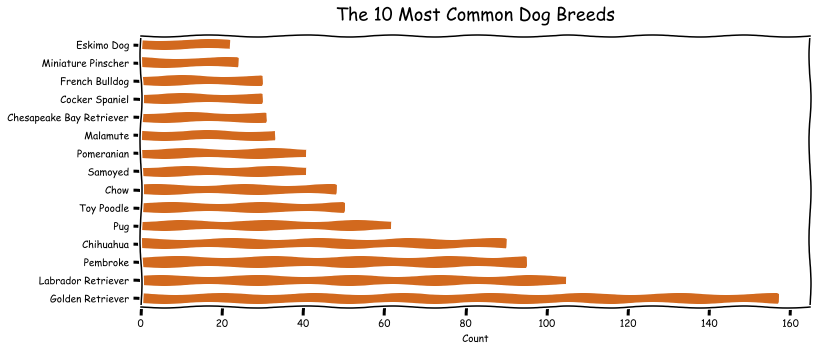

In [106]:
# plot histogram/bar chart of 10 most common dog breeds 
popular_dog_breeds.plot(kind='barh', color="chocolate", figsize=(12,5))

# labels
plt.title("The 10 Most Common Dog Breeds", fontsize=18, pad=15)
plt.xlabel('Count')
plt.show()

In [107]:
# Find mean ratings for each breed
master_df.groupby('breed').mean()

tweet_id  rating_numerator  \
breed                                                            
Afghan Hound                    8.041621e+17  9.666667           
Airedale                        7.184489e+17  9.833333           
American Staffordshire Terrier  7.597284e+17  10.312500          
Appenzeller                     7.939334e+17  11.000000          
Australian Terrier              7.785921e+17  11.500000          
Basenji                         7.007164e+17  10.333333          
Basset                          7.665597e+17  10.705882          
Beagle                          7.109935e+17  10.150000          
Bedlington Terrier              7.843395e+17  10.333333          
Bernese Mountain Dog            7.570201e+17  11.272727          
Black-And-Tan Coonhound         7.602637e+17  10.500000          
Blenheim Spaniel                7.404407e+17  11.100000          
Bloodhound                      7.573327e+17  10.428571          
Bluetick                        7.187516e+17  10.500000          
Border Collie                   7.457945e+17  10.583333          
Border Terrier                  7.933788e+17  12.142857          
Borzoi                          7.129805e+17  10.111111          
Boston Bull                     7.286202e+17  9.416667           
Bouvier Des Flandres            8.612885e+17  13.000000          
Boxer                           7.194455e+17  10.545455          
Brabancon Griffon               6.725689e+17  10.000000          
Briard                          7.700369e+17  12.333333          
Brittany Spaniel                7.174759e+17  10.375000          
Bull Mastiff                    7.541573e+17  10.400000          
Cairn                           7.311363e+17  11.000000          
Cardigan                        7.700266e+17  11.142857          
Chesapeake Bay Retriever        7.426868e+17  10.838710          
Chihuahua                       7.208465e+17  10.533333          
Chow                            7.473842e+17  11.416667          
Clumber                         7.780270e+17  11.270000          
Cocker Spaniel                  7.536087e+17  11.333333          
Collie                          7.343354e+17  10.909091          
Curly-Coated Retriever          7.222047e+17  10.333333          
Dalmatian                       7.154213e+17  9.333333           
Dandie Dinmont                  7.195659e+17  9.571429           
Doberman                        7.727214e+17  11.333333          
English Setter                  7.094418e+17  9.875000           
English Springer                7.153015e+17  10.500000          
Entlebucher                     6.798621e+17  11.000000          
Eskimo Dog                      7.474793e+17  11.409091          
Flat-Coated Retriever           7.907257e+17  10.875000          
French Bulldog                  7.851394e+17  11.166667          
German Shepherd                 7.699308e+17  11.000000          
German Short-Haired Pointer     7.246935e+17  10.500000          
Giant Schnauzer                 7.279194e+17  11.000000          
Golden Retriever                7.570831e+17  11.566879          
Gordon Setter                   7.298867e+17  11.750000          
Great Dane                      7.522649e+17  10.818182          
Great Pyrenees                  7.390970e+17  11.466667          
Greater Swiss Mountain Dog      7.846734e+17  11.333333          
Groenendael                     6.812840e+17  10.000000          
Ibizan Hound                    6.844888e+17  9.250000           
Irish Setter                    7.745175e+17  11.750000          
Irish Terrier                   7.084399e+17  10.000000          
Irish Water Spaniel             7.538108e+17  11.333333          
Irish Wolfhound                 6.717356e+17  11.000000          
Italian Greyhound               7.207074e+17  10.000000          
Japanese Spaniel                6.773010e+17  5.000000           
Keeshond                        7.147067e+17  10.250000          
Kelpie    

In [108]:
# Most common dog names
names_df = master_df.dropna(subset=['name'])

# Extract 15 most popular dog names
names = names_df.name.value_counts()[:15]
names = names.sort_values(ascending=True)
names

Stanley    5 
Dexter     5 
Jax        6 
Koda       6 
Toby       6 
Lola       6 
Winston    7 
Daisy      7 
Sadie      7 
Penny      8 
Charlie    9 
Tucker     9 
Oliver     9 
Lucy       10
Cooper     11
Name: name, dtype: int64

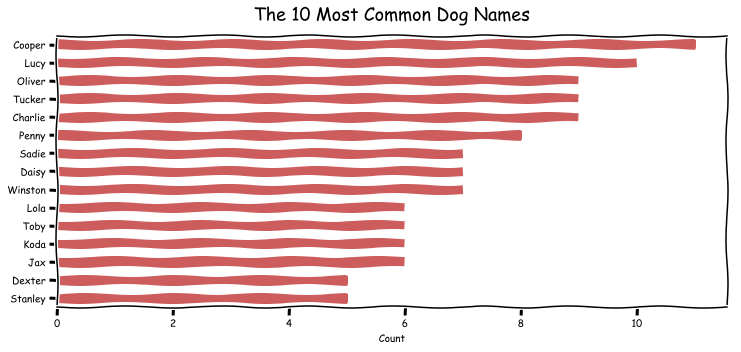

In [109]:
# plot histogram/bar chart of 15 most common dog names
names.plot(kind='barh', color="indianred", figsize=(12,5))

# labels
plt.title("The 10 Most Common Dog Names", fontsize=18, pad=15)
plt.xlabel('Count')
plt.show()

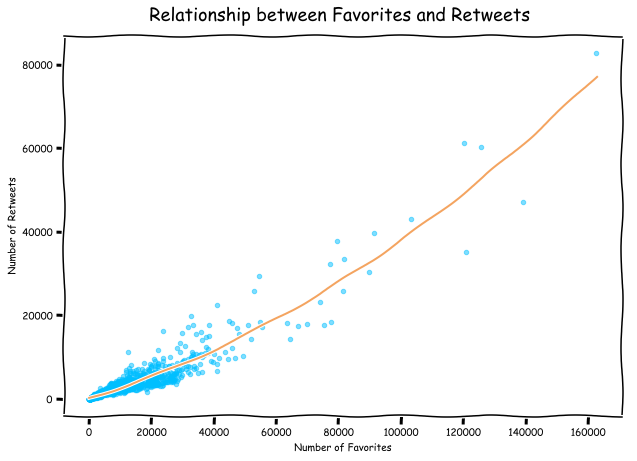

In [111]:
# How do Favorite counts and Retweet counts behave?
master_df.plot(kind='scatter', x='favorite_count', y='retweet_count', figsize=(10,7), color='deepskyblue', alpha=0.5)

plt.title("Relationship between Favorites and Retweets ", fontsize=18, pad=15)
plt.xlabel('Number of Favorites')
plt.ylabel('Number of Retweets')

# trendline
p = Polynomial.fit(master_df.favorite_count, master_df.retweet_count, 2)
plt.plot(*p.linspace(), color='sandybrown')

plt.show()

We see a quadratic relationship between the number retweets and favorites. Consequently, we consider retweets to be the stronger measure of popularity. 

In [112]:
# Because of the quadratic relationship, we consider retweets count first, then favorite count 
# as the most important measure for popularity.
pop_tweets = master_df.sort_values(['retweet_count','favorite_count'], ascending=False)
pop_tweets[['name','retweet_count', 'favorite_count','tweet_id','jpg_url']][:10]

name  retweet_count  favorite_count            tweet_id  \
55    NaN      82790          162710          744234799360020481   
56    NaN      61279          120251          739238157791694849   
550   Stephan  60362          125767          807106840509214720   
245   NaN      47182          139039          822872901745569793   
303   Duddles  42970          103110          879415818425184262   
27    Bo       39700          91365           819004803107983360   
552   NaN      37784          79560           806629075125202948   
78    Jamesy   35079          120884          866450705531457537   
1267  NaN      33407          81619           678399652199309312   
1306  Kenneth  32353          77258           676219687039057920   

                                                                                      jpg_url  
55    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg  
56    https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg  
550   https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg  
245   https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg                                          
303   https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg  
27    https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                          
552   https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                          
78    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg                                          
1267  https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg  
1306  https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg

In [113]:
# show links of most popular dog
for tweet_id in pop_tweets['tweet_id'][:10].values:
    print("https://twitter.com/dog_rates/status/" + str(tweet_id))

https://twitter.com/dog_rates/status/744234799360020481
https://twitter.com/dog_rates/status/739238157791694849
https://twitter.com/dog_rates/status/807106840509214720
https://twitter.com/dog_rates/status/822872901745569793
https://twitter.com/dog_rates/status/879415818425184262
https://twitter.com/dog_rates/status/819004803107983360
https://twitter.com/dog_rates/status/806629075125202948
https://twitter.com/dog_rates/status/866450705531457537
https://twitter.com/dog_rates/status/678399652199309312
https://twitter.com/dog_rates/status/676219687039057920


In [114]:
# generate html tags for images
def tag_generator(pop_tweets): 
    img_tags = ""
    for url in pop_tweets['jpg_url'][:10].values:
        img_tags = img_tags + "<img src='" + url + "' width=200 height=200 alt='Most popular dogs' style='display:inline'/>"
    return img_tags

tag_generator(pop_tweets)

"<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg' width=200 he

<h1>Most popular dogs according to their retweet and favorite counts.</h1>

<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/>
    


In [115]:
# Analyzing numerators
# most popular account according to user rating
pop_tweets = master_df.sort_values(['rating_numerator', 'retweet_count'], ascending=False)
pop_tweets[['name', 'rating_numerator', 'retweet_count','tweet_id','jpg_url']][:10]

name  rating_numerator  retweet_count            tweet_id  \
27   Bo        14.0              39700          819004803107983360   
243  NaN       14.0              18465          825535076884762624   
88   Gabe      14.0              15751          822462944365645825   
73   NaN       14.0              15479          881536004380872706   
521  Gary      14.0              15180          813812741911748608   
332  Walter    14.0              14307          868880397819494401   
839  Bretagne  14.0              14035          740373189193256964   
79   Cooper    14.0              7685           854120357044912130   
0    Cassie    14.0              7134           890240255349198849   
447  Kuyu      14.0              6954           831911600680497154   

                                                                                     jpg_url  
27   https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                          
243  https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg                                          
88   https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg                                          
73   https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg  
521  https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg                                          
332  https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                          
839  https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg                                          
79   https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg                                          
0    https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg                                          
447  https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg

In [116]:
# Generate html for best rated tweets
tag_generator(pop_tweets)

"<img src='https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg' widt

<h1>Most popular dogs according to their user ratings.</h1>

<img src='https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/><img src='https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline'/>


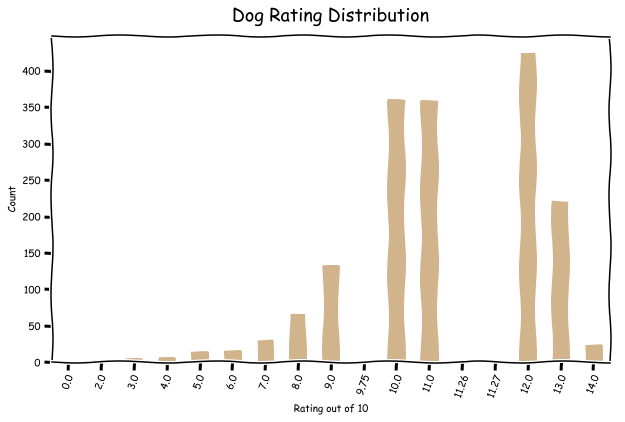

In [117]:
# Visualize distribution of ratings
pop_tweets.rating_numerator.value_counts().sort_index().plot('bar', color='tan', figsize=(10,6))

# labels
plt.title("Dog Rating Distribution", fontsize=18, pad=15)
plt.ylabel('Count')
plt.xlabel('Rating out of 10')
plt.xticks(rotation=70)
plt.show()

In [118]:
# Dog stages
master_df.dog_stage.value_counts()

without stage    1410
pupper           171 
doggo            58  
puppo            22  
floofer          7   
Name: dog_stage, dtype: int64

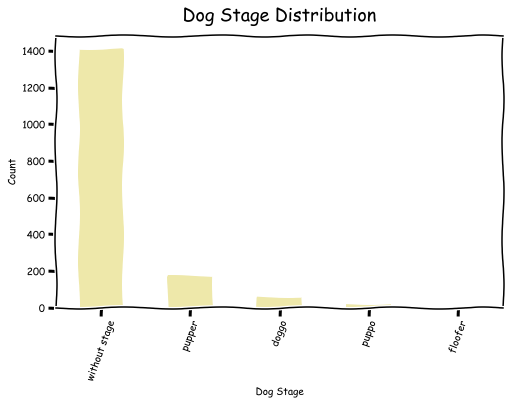

In [119]:
# Visualize distribution of dog stages
master_df.dog_stage.value_counts().plot('bar', color='palegoldenrod', figsize=(8,5))

# labels
plt.title("Dog Stage Distribution", fontsize=18, pad=15)
plt.ylabel('Count')
plt.xlabel('Dog Stage')
plt.xticks(rotation=70)
plt.show()

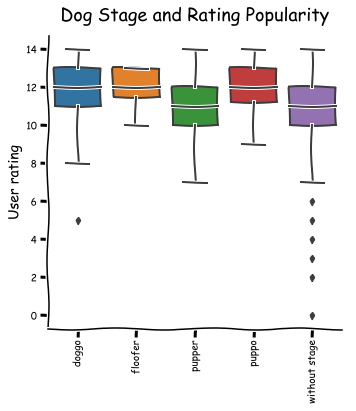

In [122]:
# Analyze popularity of dogs in terms of their stages
plt.rcParams['figure.figsize']= [12,10]

p1 = sns.catplot(x='dog_stage', y='rating_numerator', kind='box', data=master_df)

# labels and titles
plt.title("Dog Stage and Rating Popularity", fontsize=18, pad=15)
plt.xlabel('')
plt.ylabel('User rating', fontsize=14)
p1.set_xticklabels(rotation=90)

plt.show()


pupper           171
doggo            58 
puppo            22 
floofer          7  
without stage    0  
Name: dog_stage, dtype: int64

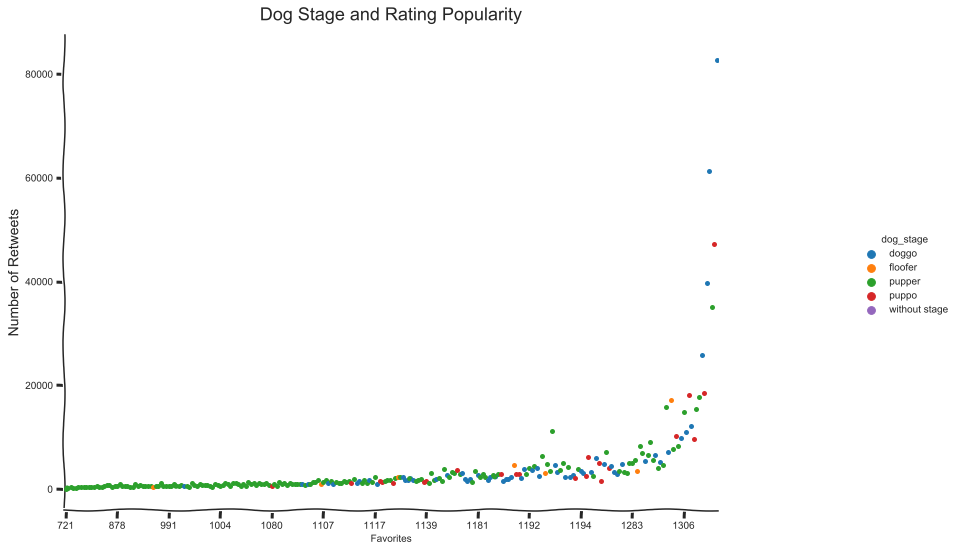

In [132]:
# remove all doges without stage
stages_df = master_df[master_df.dog_stage != "without stage"]

# plot swarm plot
sns.catplot(x="favorite_count", y="retweet_count", hue="dog_stage", kind="swarm", data=stages_df)

# style
plt.gcf().set_size_inches(15, 8)
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 0})
plt.title("Dog Stage and Rating Popularity", fontsize=18, pad=15)
plt.xlabel('Favorites')
plt.ylabel('Number of Retweets', fontsize=14)

# customize ticks
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))

plt.show()

# source: https://stackoverflow.com/questions/38809061/remove-some-x-labels-with-seaborn

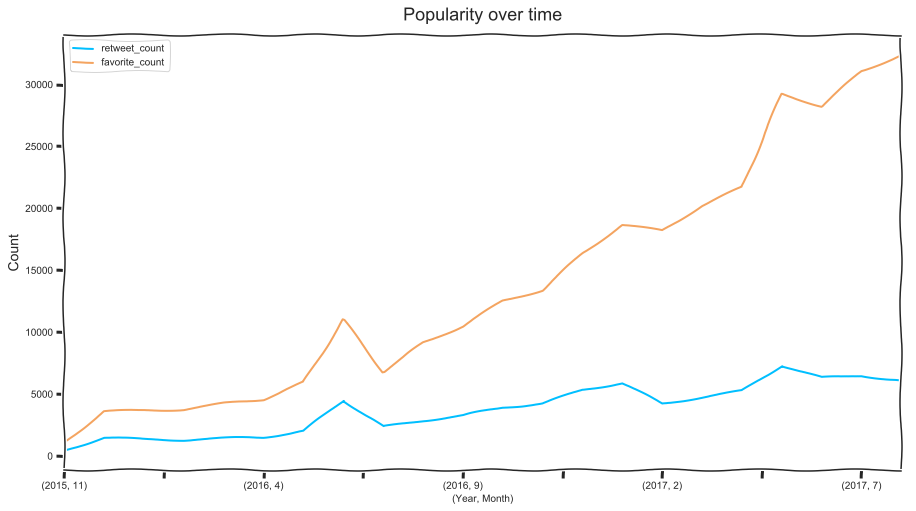

In [133]:
# Analyze popularity over time
# master_df.timestamp = pd.to_datetime(master_df.timestamp) # uncomment if master was read-in from csv
master_df.retweet_count.groupby([master_df.timestamp.dt.year, master_df.timestamp.dt.month]).mean().plot(color='deepskyblue', figsize=(15,8))

master_df.favorite_count.groupby([master_df.timestamp.dt.year, master_df.timestamp.dt.month]).mean().plot(color='sandybrown')

# labels and titles
plt.title("Popularity over time", fontsize=18, pad=15)
plt.xlabel('(Year, Month)')
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()


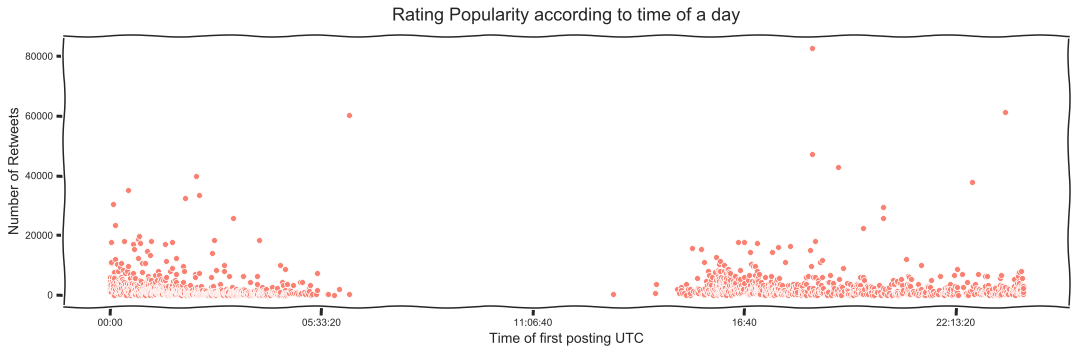

In [137]:
# Analyze popularity over time
master_df.time = master_df.timestamp.dt.time
#times = master_df.timestamp.dt.time
#master_df.retweet_count.groupby([master_df.timestamp.dt.time]).mean().plot(color='deepskyblue', )
grouped = master_df.retweet_count.groupby([master_df.timestamp.dt.time]).mean()
ax = sns.scatterplot(data=grouped, color="salmon")

# style
plt.gcf().set_size_inches(18, 5)
plt.title("Rating Popularity according to time of a day", fontsize=18, pad=15)
plt.xlabel('Time of first posting UTC', fontsize=14)
plt.ylabel('Number of Retweets', fontsize=14)

plt.show()

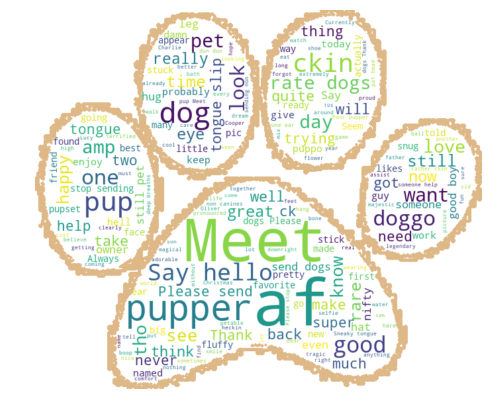

<Figure size 864x720 with 0 Axes>

In [138]:
# conda install -c conda-forge wordcloud

# Word cloud
# code source: https://github.com/amueller/word_cloud/blob/master/examples/masked.py

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = master_df.text.str.cat(sep=' ')

# read the mask image
# Image from von pnpresse.com
paw_mask = np.array(Image.open(path.join(d,'paw-mask.jpg')))

stopwords = set(STOPWORDS)
stopwords.add("@dog_rates")

wc = WordCloud(background_color="white", max_words=200, mask=paw_mask,
               stopwords=stopwords, contour_width=5, contour_color='burlywood')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "paw_cloud.png"))

# show
fig = plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

## Reporting <a name="reporting"></a>
The paragraph text